In [1]:
# for mapper
import kmapper as km
from kmapper.jupyter import display
# for lens function
import sklearn
import sklearn.manifold as manifold
# for calculations and plotting
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel(r'NBAPlayers2223a.xlsx')

In [3]:
df=pd.DataFrame(data)
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,1,Precious Achiuwa,C,23,TOR,55,12,1140,8.5,17.5,...,9.9,14.2,2.2,1.3,1.3,2.6,4.4,22.0,112,113
1,2,Steven Adams,C,29,MEM,42,42,1133,6.6,11.0,...,11.4,20.3,4.1,1.5,1.9,3.3,4.1,15.1,118,108
2,3,Bam Adebayo,C,25,MIA,75,75,2598,11.6,21.4,...,9.7,13.2,4.6,1.7,1.2,3.6,4.0,29.3,115,111
3,4,Ochai Agbaji,SG,22,UTA,59,22,1209,6.5,15.3,...,3.1,4.8,2.6,0.6,0.6,1.6,3.9,18.5,115,121
4,5,Santi Aldama,PF,22,MEM,77,20,1682,7.0,14.8,...,8.1,10.5,2.7,1.3,1.4,1.7,4.0,19.7,120,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,535,Thaddeus Young,PF,34,TOR,54,9,795,6.7,12.3,...,5.9,10.3,4.7,3.4,0.3,2.6,5.5,14.9,117,112
534,536,Trae Young,PG,24,ATL,73,73,2541,11.2,26.1,...,3.0,4.1,13.9,1.5,0.2,5.6,2.0,35.9,116,119
535,537,Omer Yurtseven,C,24,MIA,9,0,83,9.6,16.2,...,9.0,13.8,1.2,1.2,1.2,2.4,9.6,24.0,126,112
536,538,Cody Zeller,C,30,MIA,15,2,217,8.5,13.6,...,9.0,14.7,2.3,0.7,0.9,3.2,7.6,22.5,124,114


In [41]:
"Make an instance of the standard scalar. This is the scalar that converts to z scores"

'Make an instance of the standard scalar. This is the scalar that converts to z scores'

In [4]:
std_scaler = StandardScaler()

Apply that scaler to every column except for Teams (which will error since it is a string).

In [5]:
playerteams=df[["Tm"]].copy()
df=df.drop(columns=["Rk","Age","Tm"])
df[df.columns.difference(["Player","Pos"])]=std_scaler.fit_transform(df[df.columns.difference(["Player","Pos",])])
playernames=df[["Player"]].copy()
positions=df[["Pos"]].copy()
df=df.drop(columns=["Player","Pos"])
df=df.drop(df.columns[[0,1,2,20,21]],axis=1)
df

,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.314499,0.191516,-0.638774,-0.487465,0.644967,0.633278,0.228521,0.378227,1.097273,1.198574,1.334630,-0.847236,-0.174026,0.231277,-0.004338,-0.016416,0.182084
1,-0.355252,-1.030844,-1.493488,-1.668684,0.437498,0.247891,-0.381120,0.378227,3.639713,1.727241,2.834831,-0.167719,-0.020036,0.684562,0.414570,-0.157347,-0.724235
2,1.407251,0.924931,-1.493488,-1.618420,2.131829,2.431753,1.041374,1.059278,0.664517,1.128085,1.088695,0.011101,0.133955,0.155729,0.594103,-0.204324,1.140944
3,-0.390503,-0.222206,0.610422,0.593226,-0.703583,-0.779808,-0.313382,-0.421268,-0.309183,-1.198050,-0.977156,-0.704179,-0.712993,-0.297556,-0.602779,-0.251301,-0.277643
4,-0.214252,-0.316234,0.281686,0.216241,-0.357801,-0.544294,-0.042431,-0.006715,0.069478,0.564174,0.424672,-0.668415,-0.174026,0.306824,-0.542935,-0.204324,-0.120022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,-0.320002,-0.786372,-1.230499,-1.140905,0.333763,0.076608,-0.685940,-0.746988,1.151368,-0.211205,0.375485,0.046866,1.442874,-0.524199,-0.004338,0.500333,-0.750506
534,1.266250,1.808791,0.413181,0.492697,1.025327,1.618157,2.531606,2.332548,-0.633750,-1.233295,-1.149310,3.337157,-0.020036,-0.599747,1.790984,-1.143867,2.007859
535,0.702249,-0.052956,-0.310038,-0.613126,0.852436,0.461995,-0.042431,-0.154769,1.367745,0.881374,1.236256,-1.204876,-0.251022,0.155729,-0.124026,2.426395,0.444786
536,0.314499,-0.541900,-1.493488,-1.543023,1.094483,0.697510,0.804292,1.148111,1.854596,0.881374,1.457597,-0.811472,-0.635998,-0.070914,0.354726,1.486852,0.247760


In [6]:
df=df.drop(columns=["FG","FGA","TRB","PTS"])

In [7]:
data=df.to_numpy()
data

array([[-0.63877418, -0.48746455,  0.64496679, ...,  0.2312767 ,
        -0.00433814, -0.0164158 ],
       [-1.49348753, -1.66868433,  0.43749765, ...,  0.68456219,
         0.41457045, -0.15734719],
       [-1.49348753, -1.61841966,  2.13182895, ...,  0.15572912,
         0.5941027 , -0.20432432],
       ...,
       [-0.31003828, -0.61312623,  0.85243593, ...,  0.15572912,
        -0.12402631,  2.42639499],
       [-1.49348753, -1.54302265,  1.09448326, ..., -0.07091362,
         0.35472637,  1.48685238],
       [-1.49348753, -1.66868433,  0.71412317, ...,  0.91120494,
        -0.00433814,  0.21846985]])

In [10]:
lens

array([[ 1.78423602, -0.73052154],
       [ 3.20662426, -2.17925515],
       [ 4.03481391,  0.02032511],
       ...,
       [ 1.81948997, -1.89697398],
       [ 3.36715362, -1.48855966],
       [ 2.91510766, -1.79717422]])

In [8]:
mapper=km.KeplerMapper(verbose=2)

KeplerMapper(verbose=2)


In [9]:
lens = mapper.fit_transform(data, scaler=None,projection=PCA(n_components=2))

..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (538, 13)

..Projecting data using: 
	PCA(n_components=2)



In [11]:
graph = mapper.map(
    lens,
    data,
    clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=None, distance_threshold=1000),
    cover=km.Cover(n_cubes=20, perc_overlap=0.25),
)

Mapping on data shaped (538, 13) using lens shaped (538, 2)

Minimal points in hypercube before clustering: 2
Creating 400 hypercubes.
Cube_0 is empty.

Cube_1 is empty.

   > Found 1 clusters in hypercube 2.
   > Found 1 clusters in hypercube 3.
   > Found 1 clusters in hypercube 4.
   > Found 1 clusters in hypercube 5.
   > Found 1 clusters in hypercube 6.
   > Found 1 clusters in hypercube 7.
   > Found 1 clusters in hypercube 8.
   > Found 1 clusters in hypercube 9.
   > Found 1 clusters in hypercube 10.
   > Found 1 clusters in hypercube 11.
   > Found 1 clusters in hypercube 12.
   > Found 1 clusters in hypercube 13.
   > Found 1 clusters in hypercube 14.
Cube_15 is empty.

   > Found 1 clusters in hypercube 16.
   > Found 1 clusters in hypercube 17.
   > Found 1 clusters in hypercube 18.
   > Found 1 clusters in hypercube 19.
   > Found 1 clusters in hypercube 20.
   > Found 1 clusters in hypercube 21.
   > Found 1 clusters in hypercube 22.
   > Found 1 clusters in hypercube 23.

In [32]:
mapper.visualize(graph, path_html="Det22.html",include_searchbar=True,color_values=colors,node_color_function='max',color_function_name=["3P","3PA","2P","2PA","FT","FTA","ORB","DRB","AST","STL","BLK","TOV","PF","Team"],custom_tooltips=tooltips)

Wrote visualization to: Det22.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [21]:
colors=np.append(data,playerteams,axis=1)

In [22]:
colors

array([[-0.6387741838646773, -0.4874645454767969, 0.6449667910932073,
        ..., -0.004338139950598639, -0.016415800258000345, 0],
       [-1.49348752649899, -1.6686843343532989, 0.4374976529119543, ...,
        0.4145704511764348, -0.1573471918346648, 0],
       [-1.49348752649899, -1.6184196624862135, 2.1318289480588533, ...,
        0.5941027045165923, -0.20432432236021936, 0],
       ...,
       [-0.31003828285148005, -0.6131262251445099, 0.8524359292744601,
        ..., -0.12402630884403693, 2.4263949870708443, 0],
       [-1.49348752649899, -1.5430226546855859, 1.0944832571525887, ...,
        0.35472636672971597, 1.48685237655975, 0],
       [-1.49348752649899, -1.6686843343532989, 0.7141231704869584, ...,
        -0.004338139950598639, 0.2184698523697732, 0]], dtype=object)

In [24]:
playernames=playernames.transpose()

In [25]:
worker = playernames.to_numpy()

In [26]:
worker

array([['Precious Achiuwa', 'Steven Adams', 'Bam Adebayo',
        'Ochai Agbaji', 'Santi Aldama', 'Nickeil Alexander-Walker',
        'Grayson Allen', 'Jarrett Allen', 'Jose Alvarado',
        'Kyle Anderson', 'Giannis Antetokounmpo',
        'Thanasis Antetokounmpo', 'Cole Anthony', 'OG Anunoby',
        'Ryan Arcidiacono', 'Deni Avdija', 'Deandre Ayton',
        'Udoka Azubuike', 'Marvin Bagley III', 'Patrick Baldwin Jr.',
        'LaMelo Ball', 'Mo Bamba', 'Paolo Banchero', 'Desmond Bane',
        'Dalano Banton', 'Dominick Barlow', 'Harrison Barnes',
        'Scottie Barnes', 'RJ Barrett', 'Will Barton', 'Charles Bassey',
        'Keita Bates-Diop', 'Nicolas Batum', 'Darius Bazley',
        'Bradley Beal', 'Malik Beasley', 'MarJon Beauchamp',
        'Dāvis Bertāns', 'Patrick Beverley', 'Saddiq Bey', 'Khem Birch',
        'Goga Bitadze', 'Bismack Biyombo', 'Buddy Boeheim',
        'Bogdan Bogdanović', 'Bojan Bogdanović', 'Bol Bol',
        'Leandro Bolmaro', 'Devin Booker', 'Brand

In [27]:
tooltips = np.array(['Precious Achiuwa', 'Steven Adams', 'Bam Adebayo',
        'Ochai Agbaji', 'Santi Aldama', 'Nickeil Alexander-Walker',
        'Grayson Allen', 'Jarrett Allen', 'Jose Alvarado',
        'Kyle Anderson', 'Giannis Antetokounmpo',
        'Thanasis Antetokounmpo', 'Cole Anthony', 'OG Anunoby',
        'Ryan Arcidiacono', 'Deni Avdija', 'Deandre Ayton',
        'Udoka Azubuike', 'Marvin Bagley III', 'Patrick Baldwin Jr.',
        'LaMelo Ball', 'Mo Bamba', 'Paolo Banchero', 'Desmond Bane',
        'Dalano Banton', 'Dominick Barlow', 'Harrison Barnes',
        'Scottie Barnes', 'RJ Barrett', 'Will Barton', 'Charles Bassey',
        'Keita Bates-Diop', 'Nicolas Batum', 'Darius Bazley',
        'Bradley Beal', 'Malik Beasley', 'MarJon Beauchamp',
        'Dāvis Bertāns', 'Patrick Beverley', 'Saddiq Bey', 'Khem Birch',
        'Goga Bitadze', 'Bismack Biyombo', 'Buddy Boeheim',
        'Bogdan Bogdanović', 'Bojan Bogdanović', 'Bol Bol',
        'Leandro Bolmaro', 'Devin Booker', 'Brandon Boston Jr.',
        'Chris Boucher', 'James Bouknight', 'Jamaree Bouyea',
        'Tony Bradley', 'Malaki Branham', 'Jarrell Brantley',
        'Christian Braun', 'Mikal Bridges', 'Oshae Brissett',
        'Malcolm Brogdon', 'Dillon Brooks', 'Bruce Brown',
        'Greg Brown III', 'Jaylen Brown', 'Kendall Brown', 'Moses Brown',
        'Sterling Brown', 'Troy Brown Jr.', 'Jalen Brunson',
        'Thomas Bryant', 'Reggie Bullock', 'Alec Burks', 'Deonte Burton',
        'Jared Butler', 'Jimmy Butler', 'John Butler', 'Jamal Cain',
        'Kentavious Caldwell-Pope', 'Facundo Campazzo', 'Vlatko Čančar',
        'Clint Capela', 'Vernon Carey Jr.', 'Jevon Carter',
        'Wendell Carter Jr.', 'Michael Carter-Williams', 'Alex Caruso',
        'Julian Champagnie', 'Justin Champagnie', 'Kennedy Chandler',
        'Max Christie', 'Josh Christopher', 'Brandon Clarke',
        'Jordan Clarkson', 'Nic Claxton', 'Amir Coffey', 'John Collins',
        'Zach Collins', 'Chance Comanche', 'Mike Conley',
        'Pat Connaughton', 'Xavier Cooks', 'Robert Covington',
        'Torrey Craig', 'Jae Crowder', 'Jarrett Culver',
        'Cade Cunningham', 'Seth Curry', 'Stephen Curry',
        'Dyson Daniels', 'Anthony Davis', 'Johnny Davis',
        'Terence Davis', 'JD Davison', 'Darius Days', 'Dewayne Dedmon',
        'Matthew Dellavedova', 'DeMar DeRozan', 'Moussa Diabaté',
        'Mamadi Diakite', 'Hamidou Diallo', 'Gorgui Dieng',
        'Ousmane Dieng', 'Spencer Dinwiddie', 'Donte DiVincenzo',
        'Luka Dončić', 'Tyler Dorsey', 'Luguentz Dort', 'Ayo Dosunmu',
        'Devon Dotson', 'Jeff Dowtin', 'PJ Dozier', 'Goran Dragić',
        'Andre Drummond', 'Chris Duarte', 'David Duke Jr.', 'Kris Dunn',
        'Kevin Durant', 'Jalen Duren', 'Tari Eason', 'Anthony Edwards',
        'Kessler Edwards', 'Keon Ellis', 'Joel Embiid', 'Drew Eubanks',
        'Bruno Fernando', 'Dorian Finney-Smith', 'Malachi Flynn',
        'Simone Fontecchio', 'Bryn Forbes', 'Trent Forrest',
        'Evan Fournier', "De'Aaron Fox", 'Markelle Fultz',
        'Wenyen Gabriel', 'Daniel Gafford', 'Darius Garland',
        'Usman Garuba', 'Luka Garza', 'Rudy Gay', 'Paul George',
        'Taj Gibson', 'Josh Giddey', 'Shai Gilgeous-Alexander',
        'Anthony Gill', 'Jacob Gilyard', 'Rudy Gobert', 'Jordan Goodwin',
        'Aaron Gordon', 'Eric Gordon', "Devonte' Graham", 'Jerami Grant',
        'RaiQuan Gray', 'A.J. Green', 'Danny Green', 'Draymond Green',
        'Jalen Green', 'JaMychal Green', 'Javonte Green', 'Jeff Green',
        'Josh Green', 'AJ Griffin', 'Blake Griffin', 'Quentin Grimes',
        'Rui Hachimura', 'Tyrese Haliburton', 'Jordan Hall',
        'R.J. Hampton', 'Tim Hardaway Jr.', 'James Harden',
        'Jaden Hardy', 'Ron Harper Jr.', 'Montrezl Harrell',
        'Gary Harris', 'Joe Harris', 'Kevon Harris', 'Tobias Harris',
        'Shaquille Harrison', 'Josh Hart', 'Isaiah Hartenstein',
        'Udonis Haslem', 'Sam Hauser', 'Jaxson Hayes', 'Killian Hayes',
        'Gordon Hayward', 'Juancho Hernangómez', 'Willy Hernangómez',
        'Tyler Herro', 'Buddy Hield', 'Haywood Highsmith', 'George Hill',
        'Malcolm Hill', 'Aaron Holiday', 'Jrue Holiday',
        'Justin Holiday', 'Richaun Holmes', 'Al Horford',
        'Talen Horton-Tucker', 'Danuel House Jr.', 'Caleb Houstan',
        'Trevor Hudgins', 'Kevin Huerter', 'Jay Huff', "De'Andre Hunter",
        'Bones Hyland', 'Serge Ibaka', 'Andre Iguodala', 'Joe Ingles',
        'Brandon Ingram', 'Kyrie Irving', 'Jonathan Isaac', 'Jaden Ivey',
        'Frank Jackson', 'Isaiah Jackson', 'Jaren Jackson Jr.',
        'Justin Jackson', 'Quenton Jackson', 'Reggie Jackson',
        'LeBron James', 'Ty Jerome', 'Isaiah Joe', 'Alize Johnson',
        'Cameron Johnson', 'Jalen Johnson', 'James Johnson',
        'Keldon Johnson', 'Keon Johnson', 'Stanley Johnson',
        'Nikola Jokić', 'Carlik Jones', 'Damian Jones',
        'Derrick Jones Jr.', 'Herbert Jones', 'Kai Jones', 'Tre Jones',
        'Tyus Jones', 'DeAndre Jordan', 'Cory Joseph', 'Nikola Jović',
        'Johnny Juzang', 'Mfiondu Kabengele', 'Frank Kaminsky',
        'Trevor Keels', 'Luke Kennard', 'Walker Kessler', 'Braxton Key',
        'Louis King', 'Corey Kispert', 'Maxi Kleber', 'Nathan Knight',
        'Kevin Knox', 'Christian Koloko', 'John Konchar',
        'Furkan Korkmaz', 'Luke Kornet', 'Vit Krejci',
        'Jonathan Kuminga', 'Kyle Kuzma', 'Anthony Lamb', 'Jock Landale',
        'Romeo Langford', 'Jake LaRavia', 'Zach LaVine', 'A.J. Lawson',
        'Damion Lee', 'Saben Lee', 'Alex Len', 'Kawhi Leonard',
        'Meyers Leonard', 'Caris LeVert', 'Kira Lewis Jr.',
        'Damian Lillard', 'Nassir Little', 'Isaiah Livers',
        'Kenneth Lofton Jr.', 'Kevon Looney', 'Brook Lopez',
        'Robin Lopez', 'Kevin Love', 'Kyle Lowry', 'Trey Lyles',
        'Théo Maledon', 'Sandro Mamukelashvili', 'Terance Mann',
        'Tre Mann', 'Boban Marjanović', 'Lauri Markkanen',
        'Naji Marshall', 'Caleb Martin', 'Cody Martin', 'KJ Martin',
        'Tyrese Martin', 'Garrison Mathews', 'Bennedict Mathurin',
        'Wesley Matthews', 'Tyrese Maxey', 'Skylar Mays',
        'Miles McBride', 'Mac McClung', 'CJ McCollum', 'T.J. McConnell',
        'Jaden McDaniels', 'Jalen McDaniels', 'Doug McDermott',
        'JaVale McGee', 'Bryce McGowens', 'Rodney McGruder',
        'Jordan McLaughlin', "De'Anthony Melton", 'Sam Merrill',
        'Chimezie Metu', 'Khris Middleton', 'Patty Mills',
        'Shake Milton', 'Justin Minaya', 'Josh Minott',
        'Davion Mitchell', 'Donovan Mitchell', 'Evan Mobley',
        'Isaiah Mobley', 'Chima Moneke', 'Malik Monk', 'Moses Moody',
        'Xavier Moon', 'Wendell Moore Jr.', 'Ja Morant', 'Marcus Morris',
        'Markieff Morris', 'Monte Morris', 'Trey Murphy III',
        'Dejounte Murray', 'Jamal Murray', 'Keegan Murray',
        'Mike Muscala', 'Svi Mykhailiuk', 'Larry Nance Jr.',
        'Andrew Nembhard', 'Aaron Nesmith', 'Raul Neto', 'Georges Niang',
        'Daishen Nix', 'Zeke Nnaji', 'Nerlens Noel', 'Jaylen Nowell',
        'Frank Ntilikina', 'Kendrick Nunn', 'Jusuf Nurkić',
        'Jordan Nwora', "Royce O'Neale", 'Chuma Okeke', 'Josh Okogie',
        'Onyeka Okongwu', 'Isaac Okoro', 'KZ Okpala', 'Victor Oladipo',
        'Kelly Olynyk', 'Eugene Omoruyi', 'Cedi Osman',
        'Kelly Oubre Jr.', 'Chris Paul', 'Cameron Payne',
        'Gary Payton II', 'Theo Pinson', 'Scotty Pippen Jr.',
        'Mason Plumlee', 'Jakob Poeltl', 'Aleksej Pokusevski',
        'Jordan Poole', 'Kevin Porter Jr.', 'Michael Porter Jr.',
        'Otto Porter Jr.', 'Bobby Portis', 'Kristaps Porziņģis',
        'Micah Potter', 'Dwight Powell', 'Norman Powell',
        'Jason Preston', 'Joshua Primo', 'Taurean Prince',
        'Payton Pritchard', 'Trevelin Queen', 'Neemias Queta',
        'Immanuel Quickley', 'Lester Quinones', 'Julius Randle',
        'Austin Reaves', 'Cam Reddish', 'Davon Reed', 'Paul Reed',
        'Naz Reid', 'Jared Rhoden', 'Nick Richards', 'Josh Richardson',
        'Austin Rivers', 'Duncan Robinson', 'Mitchell Robinson',
        'Orlando Robinson', 'Jeremiah Robinson-Earl', 'Isaiah Roby',
        'David Roddy', 'Ryan Rollins', 'Derrick Rose', 'Terrence Ross',
        'Terry Rozier', 'Ricky Rubio', "D'Angelo Russell", 'Matt Ryan',
        'Domantas Sabonis', 'Luka Šamanić', 'Dario Šarić',
        'Olivier Sarr', 'Jordan Schakel', 'Admiral Schofield',
        'Dennis Schröder', 'Jay Scrubb', 'Dereon Seabron',
        'Alperen Şengün', 'Collin Sexton', 'Landry Shamet',
        "Day'Ron Sharpe", 'Shaedon Sharpe', 'Pascal Siakam',
        'Chris Silva', 'Ben Simmons', 'Kobi Simmons', 'Marko Simonovic',
        'Anfernee Simons', 'Jericho Sims', 'Marcus Smart',
        'Dennis Smith Jr.', 'Dru Smith', 'Ish Smith', 'Jabari Smith Jr.',
        'Jalen Smith', 'Xavier Sneed', 'Jeremy Sochan', 'Jaden Springer',
        'Lamar Stevens', 'Isaiah Stewart', 'Max Strus', 'Jalen Suggs',
        'Edmond Sumner', 'Cole Swider', "Jae'Sean Tate", 'Jayson Tatum',
        'Terry Taylor', 'Garrett Temple', 'Dalen Terry', 'Daniel Theis',
        'Cam Thomas', 'Klay Thompson', 'JT Thor', 'Matisse Thybulle',
        'Xavier Tillman Sr.', 'Isaiah Todd', 'Obi Toppin',
        'Juan Toscano-Anderson', 'Karl-Anthony Towns', 'Gary Trent Jr.',
        'P.J. Tucker', 'Myles Turner', 'Stanley Umude',
        'Jonas Valančiūnas', 'Jarred Vanderbilt', 'Fred VanVleet',
        'Devin Vassell', 'Gabe Vincent', 'Noah Vonleh', 'Nikola Vučević',
        'Dean Wade', 'Franz Wagner', 'Moritz Wagner', 'Ish Wainright',
        'Jabari Walker', 'Kemba Walker', 'Lonnie Walker IV', 'John Wall',
        'T.J. Warren', 'Duane Washington Jr.', 'P.J. Washington',
        'TyTy Washington Jr.', 'Yuta Watanabe', 'Lindy Waters III',
        'Trendon Watford', 'Peyton Watson', 'Blake Wesley',
        'Russell Westbrook', 'Coby White', 'Derrick White', 'Jack White',
        'Joe Wieskamp', 'Aaron Wiggins', 'Andrew Wiggins',
        'Lindell Wigginton', 'Alondes Williams', 'Donovan Williams',
        'Grant Williams', 'Jalen Williams', 'Jaylin Williams',
        'Jeenathan Williams', 'Kenrich Williams', 'Mark Williams',
        'Patrick Williams', 'Robert Williams', 'Vince Williams Jr.',
        'Ziaire Williams', 'Zion Williamson', 'Dylan Windler',
        'Justise Winslow', 'James Wiseman', 'Christian Wood',
        'Delon Wright', 'McKinley Wright IV', 'Gabe York',
        'Thaddeus Young', 'Trae Young', 'Omer Yurtseven', 'Cody Zeller',
        'Ivica Zubac'],
      dtype=object)

In [17]:
positions=positions.to_numpy()
playerteams=playerteams.to_numpy()

In [20]:
unique, counts = np.unique(playerteams, return_counts=True)
dict(zip(unique, counts))

{0: 522, 1: 16}

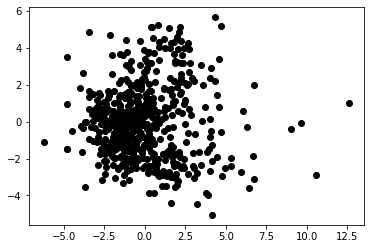

In [86]:
plt.scatter(lens[:,0],lens[:,1],c='black')


In [14]:
playerteams['Tm']=np.where(playerteams['Tm']=='DET',1,playerteams['Tm'])
playerteams['Tm']=np.where(playerteams['Tm']!=1,0,playerteams['Tm'])

In [91]:
positions['Pos']=np.where(positions['Pos']=='C',5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PF',4,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SF',3,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SG',2,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PG',1,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='C-PF',4.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PF-C',4.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PF-SF',3.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SG-SF',2.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='PG-SG',1.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SF-PF',3.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SF-SG',2.5,positions['Pos'])
positions['Pos']=np.where(positions['Pos']=='SG-PG',1.5,positions['Pos'])

In [28]:
lens[135]

array([-4.67209609,  5.04132585])

In [35]:
list(tooltips).index('2005Phoenix Suns*')

487

In [36]:
lens[487]

array([-0.56594674, -3.02643434])

In [37]:
list(tooltips).index('2007Phoenix Suns*')

489

In [38]:
list(tooltips).index('2010Phoenix Suns*')

491

In [39]:
list(tooltips).index('2010Dallas Mavericks*')

125

In [40]:
list(tooltips).index('2014San Antonio Spurs*')

551

In [41]:
lens[491]

array([ 0.03361873, -2.68657989])

In [42]:
lens[125]

array([ 0.13124759, -2.7785807 ])

In [43]:
lens[551]

array([ 1.34301644, -2.69153331])

In [44]:
lens[489]

array([ 1.0472522 , -3.58719377])

In [49]:
list(tooltips).index('2006Phoenix Suns*')

488

In [50]:
list(tooltips).index('2008Phoenix Suns*')

490

In [51]:
list(tooltips).index('2015Golden State Warriors*')

191

In [14]:
Grouptwo=[list(tooltips).index('2010Cleveland Cavaliers*'),
list(tooltips).index('2014Golden State Warriors*'),
list(tooltips).index('2015Indiana Pacers'),
list(tooltips).index('2017Miami Heat'),
list(tooltips).index('2008Orlando Magic*'),
list(tooltips).index('2009Orlando Magic*'),
list(tooltips).index('2010Orlando Magic*'),
list(tooltips).index('2008San Antonio Spurs*'),
list(tooltips).index('2009San Antonio Spurs*'),
list(tooltips).index('2010San Antonio Spurs*'),
list(tooltips).index('2011San Antonio Spurs*'),
list(tooltips).index('2012San Antonio Spurs*'),
list(tooltips).index('2013San Antonio Spurs*'),
list(tooltips).index('2014San Antonio Spurs*'),
list(tooltips).index('2015San Antonio Spurs*'),
list(tooltips).index('2017Utah Jazz*')]

In [15]:
Groupthree=[list(tooltips).index('2005Miami Heat*'),
list(tooltips).index('2006Miami Heat*'),
list(tooltips).index('2011Miami Heat*'),
list(tooltips).index('2009Orlando Magic*'),
list(tooltips).index('2011Orlando Magic*')]

In [16]:
Groupfour=[list(tooltips).index('2013Los Angeles Lakers*'),
           list(tooltips).index('2006Miami Heat*'),
           list(tooltips).index('2007Miami Heat*'),
           list(tooltips).index('2011Orlando Magic*'),
           list(tooltips).index('2012Orlando Magic*')]

In [73]:
projection

NameError: name 'projection' is not defined

In [74]:
projection=PCA(n_components=2)
projection.fit(data)

PCA(n_components=2)

In [76]:
projection.components_

array([[ 0.12262798,  0.33459947,  0.15162245,  0.05747756,  0.31346389,
         0.22870916,  0.35245397,  0.31979334, -0.32718504,  0.0427709 ,
         0.11386313, -0.24179428,  0.38024479, -0.26729541,  0.01549104,
         0.14428727, -0.22858927],
       [-0.45904379, -0.11195382, -0.24993817,  0.33651586,  0.29475206,
         0.12565867,  0.15471817, -0.06317698,  0.08482293, -0.03464601,
        -0.00749393,  0.23201532,  0.03152328,  0.05539296,  0.42372391,
         0.45897995,  0.11783896]])

In [27]:
df.loc[Groupone]

,3P%,2P%,FT%,Opp 3P%,Opp 2P%,Opp FT%,Pace,DRB%,ORB%,AST%,BLK%,TOV%,3par,Ftr,OppAST%,OppBLK%,OppTOV%
487,1.990412,0.738192,-0.423950,-1.443315,-0.729762,-1.096042,0.498679,-2.202680,0.573848,-0.327433,-0.359678,-0.828214,0.306698,0.255172,-1.940603,-0.980542,-1.154354
489,2.308020,1.462975,1.596188,0.449762,-0.428165,0.467054,0.428915,-0.869561,-0.918117,0.981617,-0.837009,0.101599,0.282274,-0.519468,-3.290332,-1.510043,0.169285
461,-2.985448,-1.399918,0.619788,-1.713754,-1.521456,-0.620317,-1.277467,-0.810957,1.907060,-0.094776,-0.762219,1.171318,-1.825642,1.047205,1.500794,-0.016514,0.768967
125,0.878783,-0.022830,1.865540,-0.631996,-0.126568,-0.144593,-0.364767,-0.219812,-0.415047,0.577774,0.363485,-0.987036,-0.498830,-0.257283,-1.616573,-1.353378,0.188730
551,2.202150,0.919388,0.821802,-0.226337,-0.842861,-0.008671,0.261812,0.744744,-0.941590,0.834491,-0.259748,0.141023,-0.077104,-1.209605,-1.463010,-0.480087,-0.469567
490,1.990412,1.680410,0.754464,-0.226337,-0.465865,-0.756239,0.684000,-1.242536,-1.032874,1.459502,0.414692,0.074817,-0.036532,0.128733,-3.318340,-1.525974,-1.323326
488,2.308020,0.701953,1.528850,0.449762,-0.541264,-1.979531,0.475491,-0.825865,-1.104358,1.210074,-0.613713,-1.042578,0.353583,-2.094601,-3.330880,-2.056615,-0.081941
191,2.255085,0.810670,0.249430,-1.308095,-1.257558,0.195211,1.092251,0.066042,-0.499014,1.821774,0.990880,-0.257092,0.570232,-1.221586,-0.632552,-1.728362,0.834150
